In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from matplotlib.pyplot import figure
import datetime as dt


# Data Loading

In [36]:
df_train=pd.read_csv('ctr_dataset_train.csv')
df_train.head()

,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,resolution,clicked
0,448ed944-b0a3-4f8e-9662-fb1202e2777b,1569445326,New Jersey,Comcast Cable,6rm7ag7,games - simulation,top-right,Samsung,SM-G925V,6.0.1,792,1408,True,False
1,3c501ca8-f771-4926-acce-d532f979b8b5,1566517297,Illinois,Verizon Wireless,74193f6,games - card,right,NaN,NaN,7.0,2560,1440,True,False
2,db342130-0f34-4d43-a72c-3c1891eade24,1566375809,California,T-Mobile USA,6549c21,games - puzzle,top-left,NaN,NaN,7.0,1280,720,True,False
3,f080c21c-7791-44c5-9429-8eb411786fe7,1568568842,California,T-Mobile USA,dng7e8p,unknown,left,Samsung,SM-J700T1,7.1.1,1280,720,True,False
4,3ca5ac37-7beb-4d2e-b0a8-662a4f9eb614,1571357999,Georgia,North Carolina Research and Education Network,hp3monn,games - simulation,top-left,T-Mobile,5049W,7.0,720,1280,True,True


# Data Exploration


## Checking for null values

In [37]:
print(f" The number of unknown apps is {df_train.app_cat.loc[df_train.app_cat=='unknown'].count()}")

 The number of unknown apps is 596348


In [38]:
df_train.app_cat.replace('unknown', np.nan,inplace=True)
df_train.app_cat.unique()


array(['games - simulation', 'games - card', 'games - puzzle', nan,
       'games - casual', 'games - arcade', 'games - action',
       'music_and_audio', 'games - educational', 'games - role_playing',
       'personalization', 'games - adventure', 'games - board',
       'entertainment', 'games - casino', 'games - strategy',
       'games - word', 'games - racing', 'education', 'games - sports',
       'productivity', 'shopping', 'social', 'libraries_and_demo',
       'games - music', 'games - trivia', 'photography', 'food_and_drink',
       'tools', 'art_and_design', 'auto_and_vehicles', 'video_players',
       'dating', 'comics', 'travel_and_local', 'sports', 'lifestyle',
       'books_and_reference', 'beauty', 'business', 'weather', 'finance',
       'news_and_magazines', 'health_and_fitness', 'events',
       'communication'], dtype=object)

<AxesSubplot: >

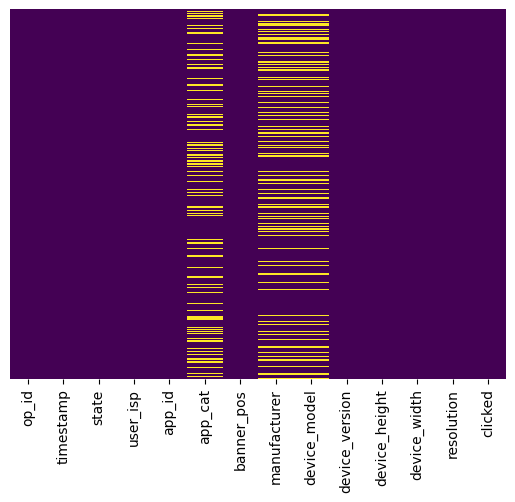

In [39]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
df_train[['device_height','device_width']].describe()

,device_height,device_width
count,2.519056e+06,2.519056e+06
mean,1.181182e+03,1.152202e+03
std,5.193045e+02,4.526964e+02
min,1.400000e+01,1.400000e+01
25%,7.200000e+02,7.200000e+02
50%,1.080000e+03,1.080000e+03
75%,1.280000e+03,1.280000e+03
max,3.120000e+03,3.120000e+03


## One hot encoding

features = ['state','banner_pos','manufacturer','app_cat']
X = df_train[features]
enc = preprocessing.OneHotEncoder()
enc.fit(X) # fit the encoder to categories in our data 
one_hot = enc.transform(X)
X_proc = pd.DataFrame(one_hot.toarray(), columns=enc.get_feature_names())


In [41]:
df_train.isnull().sum()

op_id                  0
timestamp              0
state                  0
user_isp              32
app_id                 0
app_cat           596348
banner_pos             0
manufacturer      770942
device_model      770846
device_version         0
device_height          0
device_width           0
resolution             0
clicked                0
dtype: int64

In [42]:
df_train.nunique()

op_id             2519056
timestamp         1930791
state                  51
user_isp             3316
app_id              14315
app_cat                45
banner_pos              9
manufacturer          251
device_model         2256
device_version         16
device_height         297
device_width          238
resolution              1
clicked                 2
dtype: int64

## Removing undesired columns

#### We can see that the resolution column has only one value, so it won't help the model for further classification

In [43]:
df_train=df_train.drop(columns=['resolution'])


## Correlation between features

C:\Users\liork\AppData\Local\Temp\ipykernel_21456\3782643361.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),cmap='coolwarm')


Text(0.5, 1.0, 'new_data correlation')

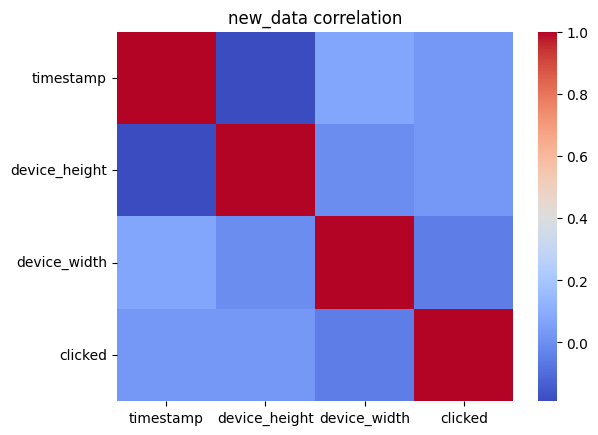

In [44]:
sns.heatmap(df_train.corr(),cmap='coolwarm')
plt.title('new_data correlation')

## Checking for imbalancing

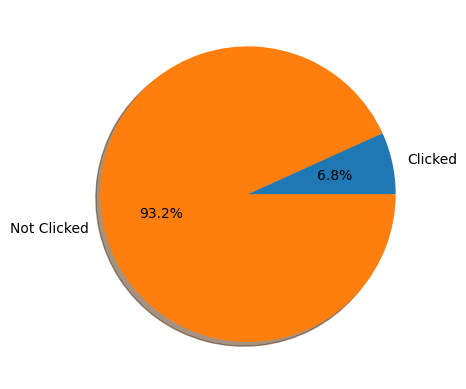

In [45]:
y = np.array([df_train.clicked.sum(),df_train.shape[0]-df_train.clicked.sum()])
mylabels = ["Clicked","Not Clicked"]
plt.pie(y, labels = mylabels,autopct='%1.1f%%', shadow = True)
plt.show()

#### We can see that the dataset is not balanced at all, about 93% of the data has a False label

## Creating boxplots per feature

In [46]:
df_train.state.unique()

array(['New Jersey', 'Illinois', 'California', 'Georgia', 'Virginia',
       'New York', 'Minnesota', 'Michigan', 'Florida', 'Ohio',
       'Tennessee', 'Alabama', 'Oregon', 'Texas', 'Massachusetts',
       'Hawaii', 'Colorado', 'Pennsylvania', 'Utah', 'Washington',
       'Missouri', 'Oklahoma', 'North Carolina', 'Arkansas', 'Indiana',
       'Mississippi', 'Louisiana', 'Rhode Island', 'South Dakota',
       'Nevada', 'Arizona', 'Kentucky', 'Maryland', 'Wisconsin',
       'South Carolina', 'Iowa', 'Connecticut', 'West Virginia',
       'Vermont', 'District of Columbia', 'Montana', 'New Mexico',
       'Kansas', 'Delaware', 'Wyoming', 'Idaho', 'New Hampshire', 'Maine',
       'Nebraska', 'North Dakota', 'Alaska'], dtype=object)

In [47]:
df_train.app_cat.unique()

array(['games - simulation', 'games - card', 'games - puzzle', nan,
       'games - casual', 'games - arcade', 'games - action',
       'music_and_audio', 'games - educational', 'games - role_playing',
       'personalization', 'games - adventure', 'games - board',
       'entertainment', 'games - casino', 'games - strategy',
       'games - word', 'games - racing', 'education', 'games - sports',
       'productivity', 'shopping', 'social', 'libraries_and_demo',
       'games - music', 'games - trivia', 'photography', 'food_and_drink',
       'tools', 'art_and_design', 'auto_and_vehicles', 'video_players',
       'dating', 'comics', 'travel_and_local', 'sports', 'lifestyle',
       'books_and_reference', 'beauty', 'business', 'weather', 'finance',
       'news_and_magazines', 'health_and_fitness', 'events',
       'communication'], dtype=object)

In [48]:
df_train['clicked_numeric']=df_train.clicked*1


AxesSubplot(0.125,0.11;0.775x0.77)


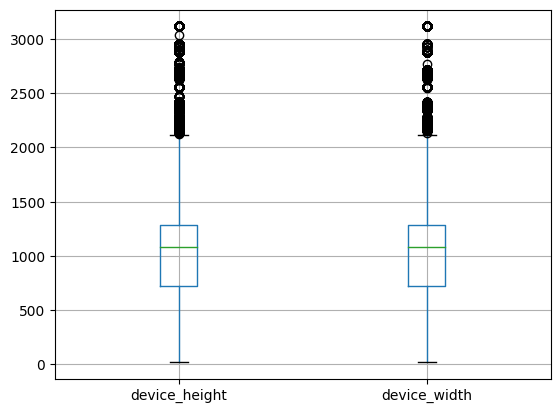

In [49]:
boxplot = df_train.boxplot(column=list(df_train.columns[df_train.dtypes=='int64'][1:]))  
print(boxplot)

In [50]:
table = pd.pivot_table(df_train, values=['clicked_numeric','clicked'], index=['manufacturer', 'device_model'],
                    aggfunc={'clicked_numeric': np.sum, 'clicked':np.size}).sort_values(by=['clicked_numeric'],ascending=False)
table=table.rename(columns={"clicked": "total", "clicked_numeric": "clicked"})
table['ratio clicked']=100*table.clicked/table.total
table

total  clicked  ratio clicked
manufacturer device_model                               
LG           LM-X210(G)    88520     6872       7.763217
Motorola     Moto E4       70483     6726       9.542727
LG           MP260         62609     6075       9.703078
Samsung      SM-J327T1     83013     4652       5.603942
LG           MS210         36479     3610       9.896105
...                          ...      ...            ...
LYF          LS-5017           2        0       0.000000
LG           X240              7        0       0.000000
             Stylo 3 Plus      9        0       0.000000
             MS323            14        0       0.000000
wor(l)d      Space Phone       2        0       0.000000

[2267 rows x 3 columns]

In [51]:
df_train.timestamp=df_train.timestamp.apply(dt.datetime.fromtimestamp)


,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,clicked,clicked_numeric
0,448ed944-b0a3-4f8e-9662-fb1202e2777b,2019-09-26 00:02:06,New Jersey,Comcast Cable,6rm7ag7,games - simulation,top-right,Samsung,SM-G925V,6.0.1,792,1408,False,0
1,3c501ca8-f771-4926-acce-d532f979b8b5,2019-08-23 02:41:37,Illinois,Verizon Wireless,74193f6,games - card,right,NaN,NaN,7.0,2560,1440,False,0
2,db342130-0f34-4d43-a72c-3c1891eade24,2019-08-21 11:23:29,California,T-Mobile USA,6549c21,games - puzzle,top-left,NaN,NaN,7.0,1280,720,False,0
3,f080c21c-7791-44c5-9429-8eb411786fe7,2019-09-15 20:34:02,California,T-Mobile USA,dng7e8p,NaN,left,Samsung,SM-J700T1,7.1.1,1280,720,False,0
4,3ca5ac37-7beb-4d2e-b0a8-662a4f9eb614,2019-10-18 03:19:59,Georgia,North Carolina Research and Education Network,hp3monn,games - simulation,top-left,T-Mobile,5049W,7.0,720,1280,True,1


## convert timestamp to day and month columns 

In [151]:
df_train["month"]=df_train.timestamp.apply(lambda x: x.month)
df_train["day"]=df_train.timestamp.apply(lambda x: x.day)
df_train["hour"]=df_train.timestamp.apply(lambda x: x.hour)




### Discretization of the time of day

In [170]:
def return_interval(x):
    if x in np.arange(6,12):
        return 'morning'
    elif x in np.arange(12,18):
        return 'noon'
    else:
        return 'evening'
df_train["interval of day"]=df_train.hour.apply(return_interval)


0          evening
1          evening
2          morning
3          evening
4          evening
            ...   
2519051    evening
2519052    evening
2519053    evening
2519054    evening
2519055    morning
Name: interval of day, Length: 2519056, dtype: object

## The relaitonship between interval of day and No. of clicked ads

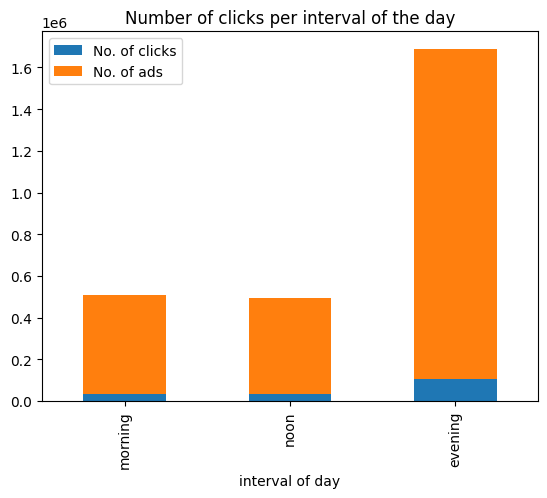

In [246]:
df_clicked_by_month_day=df_train[['clicked_numeric','interval of day']].groupby(by=['interval of day']).agg({'clicked_numeric':['sum','count']})
#print(df_clicked_by_month_day.head())
df_clicked_by_month_day=df_clicked_by_month_day.droplevel(0,axis=1)
interval_order = ["morning", "noon", "evening"]
df_clicked_by_month_day.rename(columns={'sum':'No. of clicks','count':'No. of ads'},inplace=True) 
df_clicked_by_month_day.loc[interval_order].plot.bar(stacked=True)
plt.title("Number of clicks per interval of the day")
plt.show()



#### note: We can clearly see that users tend to click on ads as the day progresses and is effected by the number of adds overall


## Find precent of ads clicked by month

In [148]:
df=df_train[['month','clicked_numeric']].groupby(by=['month']).agg({'clicked_numeric':['sum','count']})
df[('clicked_numeric',   '%clicked')]=np.round(100*df[('clicked_numeric',   'sum')]/df[('clicked_numeric',   'count')],2)
df

clicked_numeric                 
                  sum   count %clicked
month                                 
7                 366    8293     4.41
8               34744  616640     5.63
9               64821  920786     7.04
10              55298  758778     7.29
11              15329  214559     7.14

#### note: We can see that there is a slight increase of ads clicked in the last 3 months

## plot for seasonality of the days in each month

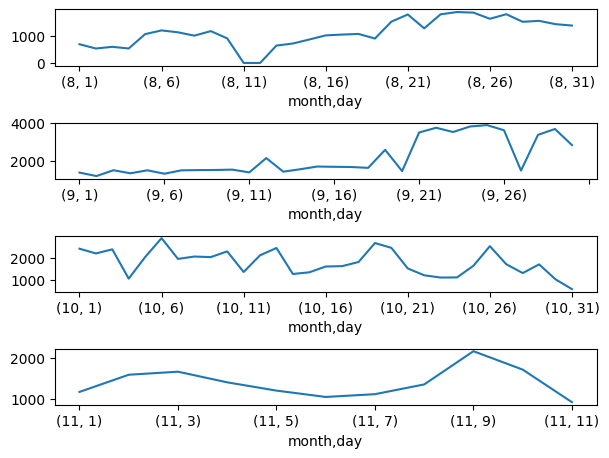

In [223]:
df_clicked_by_month_day=df_train[['day','month','clicked_numeric']].groupby(by=['month','day']).agg({'clicked_numeric':['sum']})
df_list = [df_clicked_by_month_day.loc[(i, slice(None)), :] for i in range(8,12)]
fig, axes = plt.subplots(4)
fig.tight_layout(pad=2.0)
for r in range(4):
    df_list[r].plot(ax=axes[r])
    axes[r].get_legend().remove()



In [ ]:
print("done")